In [1]:
from aocd.models import Puzzle

def load_data(mode: str):
    if mode == "test":
        file = open("test.txt", "r")
        data = file.readlines()
        file.close()
    else:
        data = Puzzle(2022, 12).input_data.splitlines()
    map = []
    for line in data:
        if "S" in line:
            S = [data.index(line), line.index('S')]
        if "E" in line:
            E = [data.index(line), line.index('E')]
        map.append([char for char in line.rstrip("\n")])
    return map, S, E

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from string import ascii_lowercase

def draw_map(map):
    for line in map:
        for c in line:
            print(c, end='')
        print()
    print()

def is_reachable(a, b):
    if b == 'S' or a == "E":
        return False
    a = -1 if a == 'S' else ascii_lowercase.index(a)
    b = len(ascii_lowercase) if b == 'E' else ascii_lowercase.index(b)
    if a + 1 == b or a == b:
        return True
    else: 
        return False

def mapt_to_graph(map: list) -> dict:
    network = {}
    for i in range(len(map)):
        for j in range(len(map[i])):
            neighbors = {}
            if i > 0:
                if is_reachable(map[i][j], map[i-1][j]):
                    neighbors[(i-1, j)] = map[i - 1][j]
            if i < len(map) - 1:
                if is_reachable(map[i][j], map[i+1][j]):
                    neighbors[(i+1, j)] = map[i + 1][j]
            if j > 0:
                if is_reachable(map[i][j], map[i][j-1]):
                    neighbors[(i, j-1)] = map[i][j-1]
            if j < len(map[i]) - 1:
                if is_reachable(map[i][j], map[i][j+1]):
                    neighbors[(i, j+1)] = map[i][j+1]
            if map[i][j] == 'z':
                print(neighbors)
            
            network[(i, j)] = neighbors
    return network

def dijkstra(map, S, E):
    network = mapt_to_graph(map)
    G = nx.DiGraph()
    for k in network.keys():
        for n in network[k].keys():
            G.add_edge(k, n)
    return G

# return nx.dijkstra_path_length(G, tuple(S), tuple(E))


In [3]:
map, start, end = load_data("input")
# draw_map(map)
N = dijkstra(map, start, end)

{(20, 40): 'E', (20, 42): 'z'}
{(20, 41): 'z', (20, 43): 'z'}
{(20, 42): 'z'}


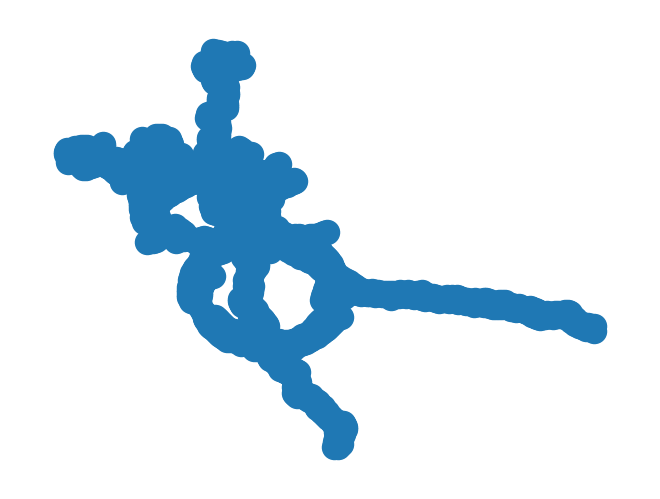

In [13]:
nx.draw(N, pos=nx.drawing.layout.kamada_kawai_layout(N))